# **20230509**
<br>

## **Titanic: 생존자 예측하기**

### **Predict survival on the Titanic**

- Defining the problem statement
- Collecting the data
- Exploratory data analysis
- Feature engineering
- Modelling
- Testing

### **1. 문제정의**

In [1385]:
from IPython.display import Image
Image(url='https://static.timesofisrael.com/atlantajewishtimes/uploads/2022/03/DT6RD9-640x400.jpg')

### **2. 데이터**

traning data set and testing data set are given by Kaggle you can download
kaggle directly kaggle(https://www.kaggle.com/competitions/titanic/data)

#### **load train, test dataset using Pandas**

In [1386]:
import pandas as pd

train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

### **3. Exploratory data analysis**

Printing first 5 rows of the train dataset.

In [1387]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### **Data Dictionary**

- Survived(생존 여부): 0 = No, 1 = Yes                  
=> 답
- pclass: Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd
- sibsp(형제/부부 탑승 여부): # of siblings / spouses aboard the Titanic
- parch(부모/자식 탑승 여부): # of parents / children aboard the Titanic
- ticket: Ticket number
- fare: 티켓 가격
- cabin: Cabin number
- embarked(선착장): Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton

**Total rows and columns**

We can see that there are 891 rows and 12 columns in our training dataset.

In [1388]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [1389]:
train['Survived'].value_counts() # => 불균형 데이터

Survived
0    549
1    342
Name: count, dtype: int64

In [1390]:
def class_ratio(num):
    class_nan = train[train['Pclass']==num]['Cabin'].isnull().sum()
    class_count = train[train['Pclass']==num]['Cabin'].count()

    class_sum = class_nan+class_count
    class_rat = class_nan/class_sum

    print(num,'등칸 NaN 비율 : {0:.4f}'.format(class_rat))

In [1391]:
class_ratio(1), class_ratio(2), class_ratio(3)

1 등칸 NaN 비율 : 0.1852
2 등칸 NaN 비율 : 0.9130
3 등칸 NaN 비율 : 0.9756


(None, None, None)

In [1392]:
train[train['Pclass']==2]['Cabin'].isnull().sum(), train[train['Pclass']==2]['Cabin'].count()

(168, 16)

In [1393]:
train[train['Pclass']==3]['Cabin'].isnull().sum(), train[train['Pclass']==3]['Cabin'].count()

(479, 12)

In [1394]:
train['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [1395]:
for name in train['Name']:
    if 'Thomas' in name :
        print(name)

Byles, Rev. Thomas Roussel Davids
Pears, Mrs. Thomas (Edith Wearne)
Sage, Master. Thomas Henry
O'Brien, Mrs. Thomas (Johanna "Hannah" Godfrey)
Stead, Mr. William Thomas
Smith, Mr. Thomas
Pears, Mr. Thomas Clinton
Davison, Mrs. Thomas Henry (Mary E Finck)
O'Brien, Mr. Thomas
Beavan, Mr. William Thomas
Meek, Mrs. Thomas (Annie Louise Rowley)
Morrow, Mr. Thomas Rowan
Brown, Mrs. Thomas William Solomon (Elizabeth Catherine Ford)
Cardeza, Mr. Thomas Drake Martinez
Brown, Mr. Thomas William Solomon
Theobald, Mr. Thomas Leonard
Kilgannon, Mr. Thomas J
Thomas, Master. Assad Alexander
Andrews, Mr. Thomas Jr
McCormack, Mr. Thomas Joseph
Mudd, Mr. Thomas Charles
Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)


---

# **20230510**

In [1396]:
train.shape
#(행,열)

(891, 12)

In [1397]:
# 테스트데이터에는 생존 여부 없음
test.shape

(418, 11)

In [1398]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [1399]:
train[train['Parch']==3]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
86,87,0,3,"Ford, Mr. William Neal",male,16.0,1,3,W./C. 6608,34.3750,NaN,S
437,438,1,2,"Richards, Mrs. Sidney (Emily Hocking)",female,24.0,2,3,29106,18.7500,NaN,S
736,737,0,3,"Ford, Mrs. Edward (Margaret Ann Watson)",female,48.0,1,3,W./C. 6608,34.3750,NaN,S
774,775,1,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S
858,859,1,3,"Baclini, Mrs. Solomon (Latifa Qurban)",female,24.0,0,3,2666,19.2583,NaN,C


In [1400]:
len(train[train['Parch']==1]),len(train[train['Parch']==2])

(118, 80)

#### **데이터 시각화**

In [1401]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

##### **Bar Chart for Categorical Features : 변수들의 생존 관련성**

- Pclass
- Sex
- Sibsp
- Parch
- Embarked
- Cabin

In [1402]:
train[train['Survived'] == 1]['Pclass'].value_counts()

Pclass
1    136
3    119
2     87
Name: count, dtype: int64

In [1403]:
def bar_chart(feature):
    '''
    desc : 특정 변수들의 생존 관련성 시각화

    parameter:
    feature: columns => Pclass, Sex, SibSp, Parch, Embarked, Cabin
    '''
    survived = train[train['Survived'] == 1][feature].value_counts()
    dead = train[train['Survived'] == 0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index=['Survived','Dead']
    
    df.plot(kind='bar', stacked=True, figsize=(6,4),colormap='Set3')


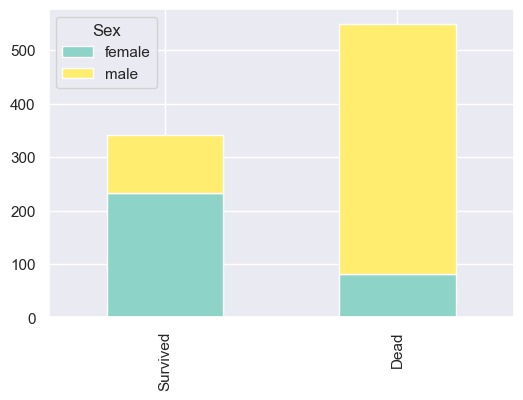

In [1404]:
bar_chart('Sex')

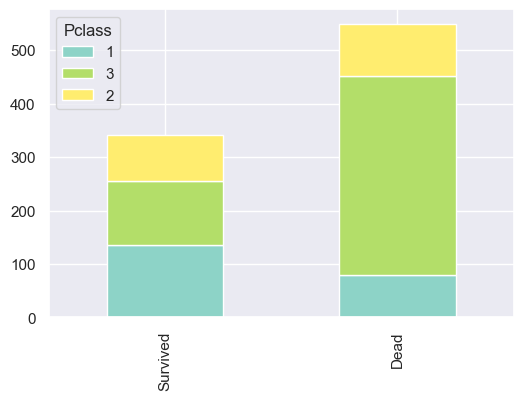

In [1405]:
bar_chart('Pclass')

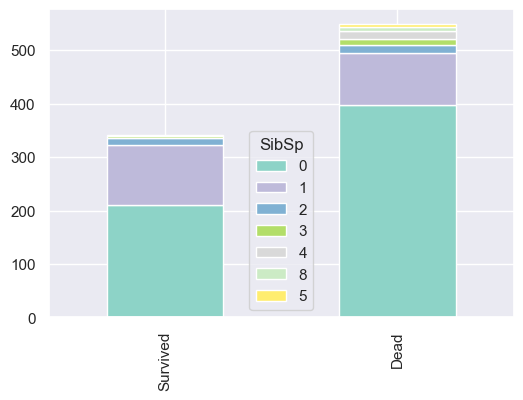

In [1406]:
bar_chart('SibSp')

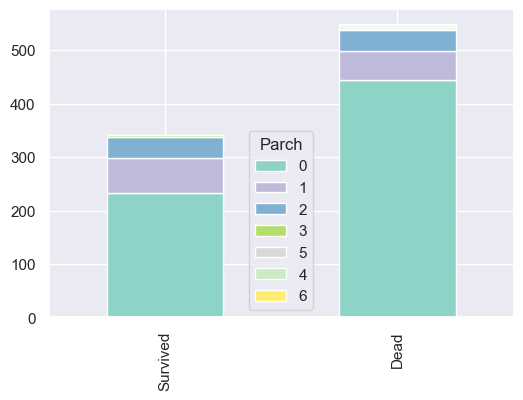

In [1407]:
bar_chart('Parch')

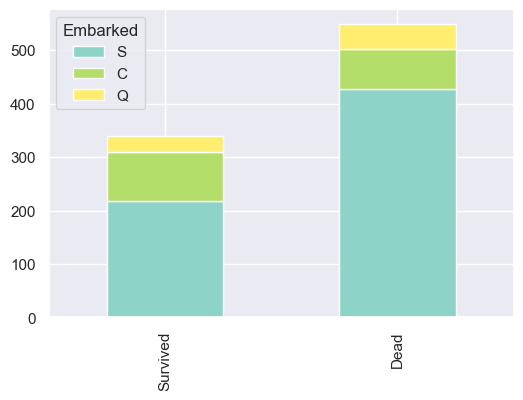

In [1408]:
bar_chart('Embarked')

In [1409]:
train['Cabin'].value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

In [1410]:
train[train['Cabin']=='B96 B98']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
390,391,1,1,"Carter, Mr. William Ernest",male,36.0,1,2,113760,120.0,B96 B98,S
435,436,1,1,"Carter, Miss. Lucile Polk",female,14.0,1,2,113760,120.0,B96 B98,S
763,764,1,1,"Carter, Mrs. William Ernest (Lucile Polk)",female,36.0,1,2,113760,120.0,B96 B98,S
802,803,1,1,"Carter, Master. William Thornton II",male,11.0,1,2,113760,120.0,B96 B98,S


In [1411]:
train[train['Cabin']=='C22 C26']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
297,298,0,1,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.55,C22 C26,S
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.55,C22 C26,S
498,499,0,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.55,C22 C26,S


### **4. 데이터의 특징 처리하기 : 데이터 전처리**


        [주의사항] : train, test data 동시 전처리

#### 4.1 titanic 침몰 상태?

In [1412]:
#Image(data='../data/titanic/img.jpg')

#### 4.2 Name(이름 => Mr, Miss, Mrs 타이틀 추출)

In [1413]:
train['Name'].str.extract(' ([A-Za-z]+)\.',expand=False) # expand=True : DataFrame return

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Name, Length: 891, dtype: object

In [1414]:
train_test_data = [train,test]

for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.',expand=False)

In [1415]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [1416]:
train['Title'].value_counts()

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64

In [1417]:
test['Title'].value_counts()

Title
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: count, dtype: int64

##### Title mapping :

variable -> feature

- Mr : 0
- Miss : 1
- Mrs :2
- Master :3
- Others : 4

In [1418]:
train['Title'].value_counts().index

Index(['Mr', 'Miss', 'Mrs', 'Master', 'Dr', 'Rev', 'Mlle', 'Major', 'Col',
       'Countess', 'Capt', 'Ms', 'Sir', 'Lady', 'Mme', 'Don', 'Jonkheer'],
      dtype='object', name='Title')

In [1419]:
title_mapping = {'Mr':4, 'Miss':1, 'Mrs':2, 'Master':3
                 , 'Dr':0, 'Rev':0, 'Mlle':0, 'Major':0, 'Col':0
                 ,'Countess':0, 'Capt':0, 'Ms':0, 'Sir':0, 'Lady':0
                 , 'Mme':0, 'Don':0, 'Jonkheer':0
                 }

In [1420]:
train['Title'] = train['Title'].map(title_mapping)

In [1421]:
#for dataset in train_test_data:
#    dataset['Title'] = dataset['Title'].map(title_mapping)

In [1422]:
test['Title'].value_counts().index

Index(['Mr', 'Miss', 'Mrs', 'Master', 'Col', 'Rev', 'Ms', 'Dr', 'Dona'], dtype='object', name='Title')

In [1423]:
title_mapping = {'Mr':4, 'Miss':1, 'Mrs':2, 'Master':3
                 , 'Col':0, 'Rev':0, 'Ms':0, 'Dr':0, 'Dona':0
                 }

test['Title'] = test['Title'].map(title_mapping)

In [1424]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,4
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,4
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,4
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2


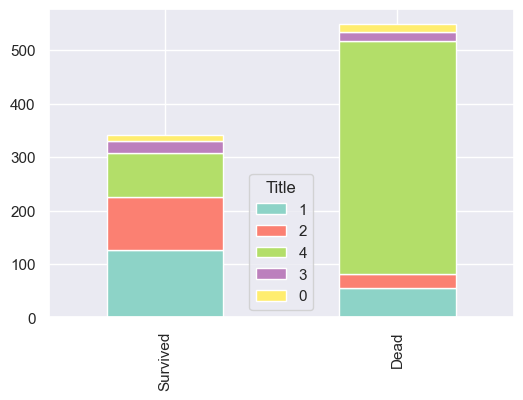

In [1425]:
bar_chart('Title')

In [1426]:
# Name del

#train.drop('Name',axis=1,inplace=True)
#test.drop('Name',axis=1,inplace=True)

In [1427]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,4
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,4


#### **4.3 Sex**

- male : 0
- female : 1

In [1428]:
sex_mapping = {'male':0, 'female':1}

for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

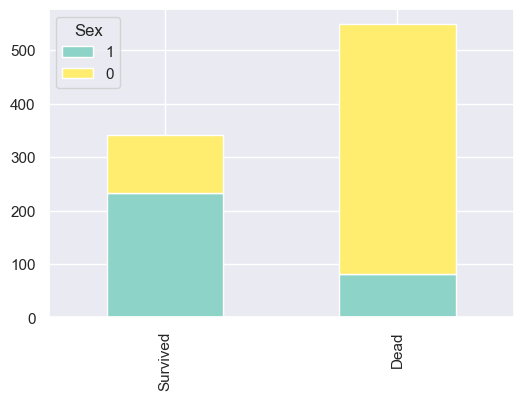

In [1429]:
bar_chart('Sex')

#### **4.4 Age**

##### 4.4.1 some age is missing

In [1430]:
train['Age'].isnull().sum(), test['Age'].isnull().sum()

(177, 86)

In [1431]:
train.groupby('Title')['Age'].count()

Title
0     26
1    146
2    108
3     36
4    398
Name: Age, dtype: int64

In [1432]:
# title별 나이 중앙값
train.groupby('Title')['Age'].median()

Title
0    44.5
1    21.0
2    35.0
3     3.5
4    30.0
Name: Age, dtype: float64

In [1433]:
# 모든 행의 title별 나이 중앙값
train.groupby('Title')['Age'].transform('median')

0      30.0
1      35.0
2      21.0
3      35.0
4      30.0
       ... 
886    44.5
887    21.0
888    21.0
889    30.0
890    30.0
Name: Age, Length: 891, dtype: float64

In [1434]:
train[train['Age'].isnull()].groupby('Title')['Survived'].count()

Title
0      1
1     36
2     17
3      4
4    119
Name: Survived, dtype: int64

In [1435]:
# fill missing age with median age for each title(Mr,Mrs,Miss,Master,Others)
# Age 결측치 해당 Title의 나이의 중앙값으로 채우기

train['Age'].fillna(train.groupby('Title')['Age'].transform('median'),inplace=True)
test['Age'].fillna(test.groupby('Title')['Age'].transform('median'),inplace=True)

In [1436]:
# nan값 제대로 채워졌는지 확인
train['Title'].isnull().sum(),test['Title'].isnull().sum()

(0, 0)

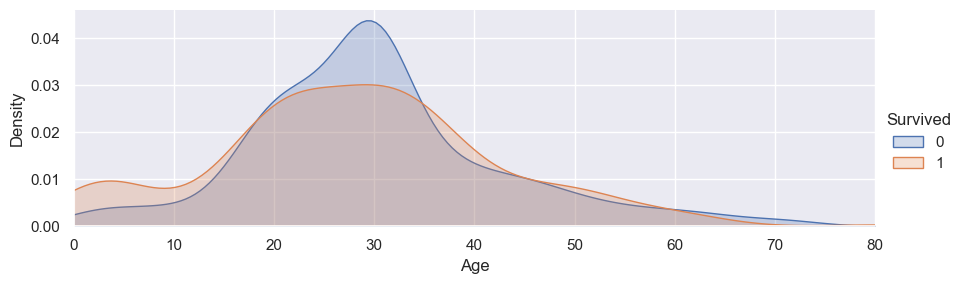

In [1437]:
# 나이(float)별 Plclass 그래프

facet = sns.FacetGrid(train,hue='Survived',aspect=3)   # 그래프 바탕
facet.map(sns.kdeplot,'Age',fill=True)
facet.set(xlim=(0,train['Age'].max()))    
facet.add_legend()

plt.show()

* 그래프의 교차점을 기준으로 나이(float=연속형)를 카테고리(범주형) 분류하기

##### 4.4.2 Binning


In [1438]:
train.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Title
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,29.387957,0.523008,0.381594,32.204208,2.940516
std,257.353842,0.486592,0.836071,0.477990,13.262592,1.102743,0.806057,49.693429,1.344923
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,21.000000,0.000000,0.000000,7.910400,2.000000
50%,446.000000,0.000000,3.000000,0.000000,30.000000,0.000000,0.000000,14.454200,4.000000
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,4.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,4.000000


In [1439]:
for dataset in train_test_data:
    dataset.loc[dataset['Age'] <= 10, 'Age'] =0
    dataset.loc[(dataset['Age'] >10) & (dataset['Age'] <= 17), 'Age'] = 0.4
    dataset.loc[(dataset['Age'] >17) & (dataset['Age'] <= 21), 'Age'] = 0.8
    dataset.loc[(dataset['Age'] >21) & (dataset['Age'] <= 28), 'Age'] = 1.2
    dataset.loc[(dataset['Age'] >28) & (dataset['Age'] <= 32), 'Age'] = 1.6
    dataset.loc[(dataset['Age'] >32) & (dataset['Age'] <= 45), 'Age'] = 2
    dataset.loc[dataset['Age'] >45, 'Age'] = 2.4

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,1.2,1,0,A/5 21171,7.2500,NaN,S,4
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",1,1.2,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",0,2.0,0,0,373450,8.0500,NaN,S,4


In [1440]:
train['Age'].value_counts()

Age
1.6    203
2.0    183
1.2    158
0.8    127
2.4    103
0.0     68
0.4     49
Name: count, dtype: int64

In [1441]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Title        891 non-null    int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 90.6+ KB


In [1444]:
test['Age'].value_counts()

Age
1    197
2    131
0     90
Name: count, dtype: int64

In [1445]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    int32  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Title        891 non-null    int64  
dtypes: float64(1), int32(1), int64(7), object(4)
memory usage: 87.1+ KB


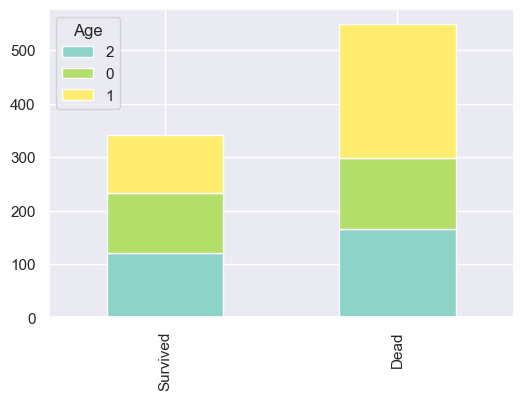

In [1446]:
bar_chart('Age')

#### 4.5 Embarked(도시 선착장)

##### 4.5.1 filling missing vlaues

In [1447]:
train[train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
61,62,1,1,"Icard, Miss. Amelie",1,2,0,0,113572,80.0,B28,NaN,1
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",1,2,0,0,113572,80.0,B28,NaN,2


In [1448]:
train[train['Pclass']==1]['Embarked'].value_counts() # -> Series

Embarked
S    127
C     85
Q      2
Name: count, dtype: int64

<Axes: >

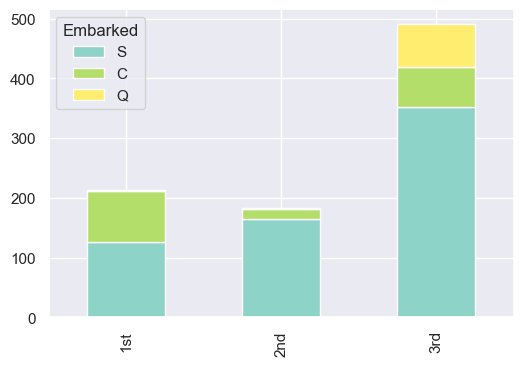

In [1449]:
Pclass1 = train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass']==3]['Embarked'].value_counts()

df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st','2nd','3rd']
df.plot(kind='bar', stacked=True, figsize=(6,4),colormap='Set3')

In [1450]:
df

Embarked,S,C,Q
1st,127,85,2
2nd,164,17,3
3rd,353,66,72


In [1451]:
train['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [1452]:
# 대부분 S embark 에서 탐 => fillna('S')

train['Embarked'] = train['Embarked'].fillna('S')
test['Embarked'] = test['Embarked'].fillna('S')

In [1453]:
train['Embarked'].isnull().sum(), test['Embarked'].isnull().sum()

(0, 0)

In [1454]:
train['Embarked'].value_counts().index

Index(['S', 'C', 'Q'], dtype='object', name='Embarked')

In [1455]:
embarked_mapping = {'S':0, 'C':1, 'Q':2}
train['Embarked'] = train['Embarked'].map(embarked_mapping)
test['Embarked'] = test['Embarked'].map(embarked_mapping)

#### 4.6 Fare (티켓 가격)

In [1456]:
train['Fare'].isnull().sum(), test['Fare'].isnull().sum()

(0, 1)

In [1457]:
test['Fare'].fillna(
    test.groupby('Pclass')['Fare'].transform('median'), inplace=True
)

In [1458]:
test['Fare'].isnull().sum()

0

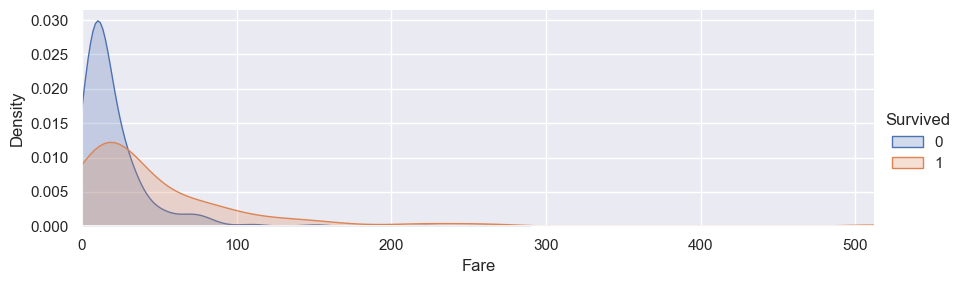

In [1459]:
facet = sns.FacetGrid(train, hue="Survived",aspect=3)
facet.map(sns.kdeplot,'Fare',fill= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.show()

group_size

In [1460]:
for ticket_num in train['Ticket'].unique():
    train.loc[train['Ticket']==ticket_num,'group_size'] = len(train[train['Ticket']==ticket_num])

for ticket_num in test['Ticket'].unique():
    test.loc[test['Ticket']==ticket_num,'group_size'] = len(test[test['Ticket']==ticket_num])

In [1461]:
train['Fare'] = train['Fare']/train['group_size']
test['Fare'] = test['Fare']/test['group_size']

In [1462]:
train_test_data = [train,test]

for dataset in train_test_data:
    dataset.loc[dataset['group_size'] == 1, 'group_size'] = 0
    dataset.loc[dataset['group_size'] == 2, 'group_size'] = 1
    dataset.loc[(dataset['group_size'] == 3) | (dataset['group_size'] == 4), 'group_size'] = 2
    dataset.loc[dataset['group_size'] > 4, 'group_size'] = 3


In [1463]:
train['group_size'].unique()

array([0., 1., 2., 3.])

Fare binning



(0.0, 100.0)

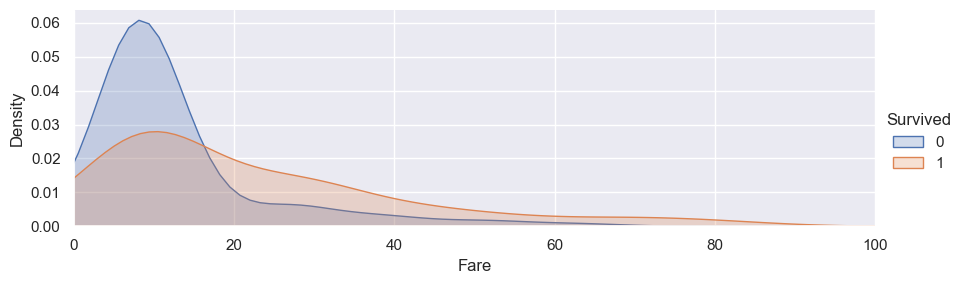

In [1464]:
facet = sns.FacetGrid(train, hue="Survived",aspect=3)
facet.map(sns.kdeplot,'Fare',fill= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(0,100)

In [1465]:
train.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,group_size
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,1.047138,0.523008,0.381594,17.788989,0.361392,2.940516,0.616162
std,257.353842,0.486592,0.836071,0.477990,0.770247,1.102743,0.806057,21.218157,0.635673,1.344923,0.898643
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.762500,0.000000,2.000000,0.000000
50%,446.000000,0.000000,3.000000,0.000000,1.000000,0.000000,0.000000,8.850000,0.000000,4.000000,0.000000
75%,668.500000,1.000000,3.000000,1.000000,2.000000,1.000000,0.000000,24.288200,1.000000,4.000000,1.000000
max,891.000000,1.000000,3.000000,1.000000,2.000000,8.000000,6.000000,221.779200,2.000000,4.000000,3.000000


In [1466]:
train_test_data = [train,test]
for dataset in train_test_data:

    dataset.loc[dataset['Fare'] <= 7,'Fare'] = 0.4
    dataset.loc[(dataset['Fare'] >7) & (dataset['Fare'] <=8.8), 'Fare'] = 0.8
    dataset.loc[(dataset['Fare'] >8.8) & (dataset['Fare'] <=17), 'Fare'] = 1.2
    dataset.loc[(dataset['Fare'] >17) & (dataset['Fare'] <=30), 'Fare'] = 1.6
    dataset.loc[(dataset['Fare'] >30) & (dataset['Fare'] <=100), 'Fare'] = 2.0
    dataset.loc[dataset['Fare'] > 100,'Fare'] = 2.4


<Axes: >

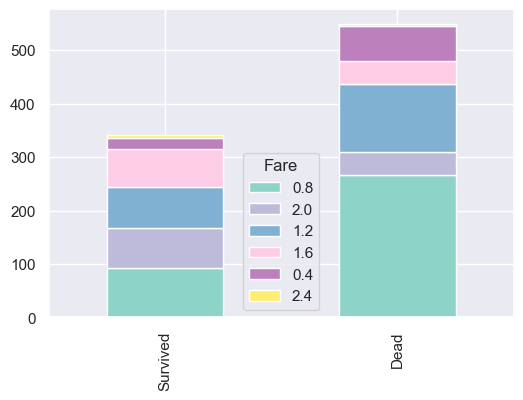

In [1467]:
survived = train[train['Survived'] == 1]['Fare'].value_counts()
dead = train[train['Survived'] == 0]['Fare'].value_counts()
df = pd.DataFrame([survived,dead])
df.index=['Survived','Dead']

df.plot(kind='bar', stacked=True, figsize=(6,4),colormap='Set3')


#### 4.7 Cabin (객실정보)

In [1468]:
train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [1469]:
train[train['Cabin']=='T']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,group_size
339,340,0,1,"Blackwell, Mr. Stephen Weart",0,2,0,0,113784,2.0,T,0,4,0.0


In [1470]:
#train[train['Cabin'].str.extract('([A]\d+)',expand=False).notnull()]

In [1471]:
#train[train['Cabin'].str.extract('(D\d+)',expand=False).notnull()]

In [1472]:
train[train['Cabin'].str.extract('([F] [A-Z]\d+)',expand=False).notnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,group_size
75,76,0,3,"Moen, Mr. Sigurd Hansen",0,1,0,0,348123,0.8,F G73,0,4,0.0
128,129,1,3,"Peter, Miss. Anna",1,0,1,1,2668,1.2,F E69,1,1,1.0
699,700,0,3,"Humblen, Mr. Adolf Mathias Nicolai Olsen",0,2,0,0,348121,0.8,F G63,0,4,0.0
715,716,0,3,"Soholt, Mr. Peter Andreas Lauritz Andersen",0,0,0,0,348124,0.8,F G73,0,4,0.0


In [1473]:

#train[train['Cabin'].str.extract('([A-Z]\d+ [A-Z]\d+)',expand=False).notnull()]

In [1474]:
train[train['Pclass']==1]['Cabin'].value_counts()

Cabin
B96 B98        4
C23 C25 C27    4
C22 C26        3
E24            2
E67            2
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 133, dtype: int64

In [1475]:
train[train['Cabin'].str.extract('(F\d+)',expand=False).notnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,group_size
66,67,1,2,"Nye, Mrs. (Elizabeth Ramell)",1,1,0,0,C.A. 29395,1.2,F33,0,2,0.0
148,149,0,2,"Navratil, Mr. Michel (""Louis M Hoffman"")",0,2,0,2,230080,0.8,F2,0,4,2.0
183,184,1,2,"Becker, Master. Richard F",0,0,2,1,230136,1.6,F4,0,3,1.0
193,194,1,2,"Navratil, Master. Michel M",0,0,1,1,230080,0.8,F2,0,3,2.0
340,341,1,2,"Navratil, Master. Edmond Roger",0,0,1,1,230080,0.8,F2,0,3,2.0
345,346,1,2,"Brown, Miss. Amelia ""Mildred""",1,1,0,0,248733,1.2,F33,0,1,0.0
516,517,1,2,"Lemore, Mrs. (Amelia Milley)",1,2,0,0,C.A. 34260,1.2,F33,0,2,0.0
618,619,1,2,"Becker, Miss. Marion Louise",1,0,2,1,230136,1.6,F4,0,1,1.0
776,777,0,3,"Tobin, Mr. Roger",0,1,0,0,383121,0.8,F38,2,4,0.0


In [1476]:
train[train['Pclass']==2]['Cabin'].isnull().sum()

168

In [1477]:
train[train['Pclass']==3]['Cabin'].value_counts()

Cabin
G6       4
F G73    2
E121     2
F E69    1
E10      1
F G63    1
F38      1
Name: count, dtype: int64

In [1478]:
train[train['Pclass']==3]['Cabin'].isnull().sum()

479

In [1479]:
train['Cabin'] = train['Cabin'].str[:1]
test['Cabin'] = test['Cabin'].str[:1]

In [1480]:
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}

train['Cabin'] = train['Cabin'].map(cabin_mapping)
test['Cabin'] = test['Cabin'].map(cabin_mapping)

In [1481]:
test.loc[test['Pclass']==3,'Cabin']=test.loc[test['Pclass']==3,'Cabin'].fillna(2.2)
test.loc[test['Pclass']==3,'Cabin']=test.loc[test['Pclass']==3,'Cabin'].fillna(2.2)

In [1482]:
# # fill missing Fare with median fare for each Pclass
train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
test["Cabin"].fillna(test.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

#### 4.8 FamilySize(가족의 크기)

In [1483]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    int32  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    float64
 11  Embarked     891 non-null    int64  
 12  Title        891 non-null    int64  
 13  group_size   891 non-null    float64
dtypes: float64(3), int32(1), int64(8), object(2)
memory usage: 94.1+ KB


In [1484]:
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1


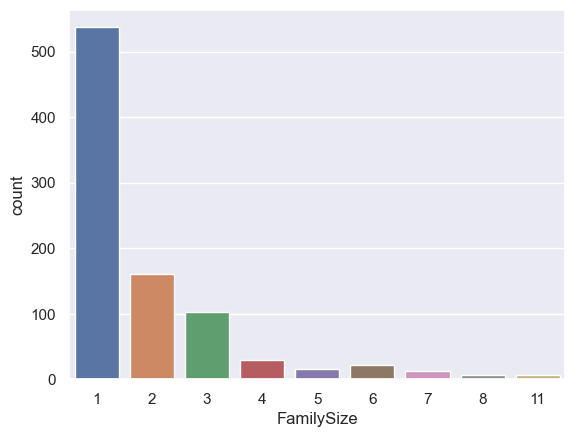

In [1485]:
ax = sns.countplot(data=train, x='FamilySize')
plt.show()

(0.0, 1.0)

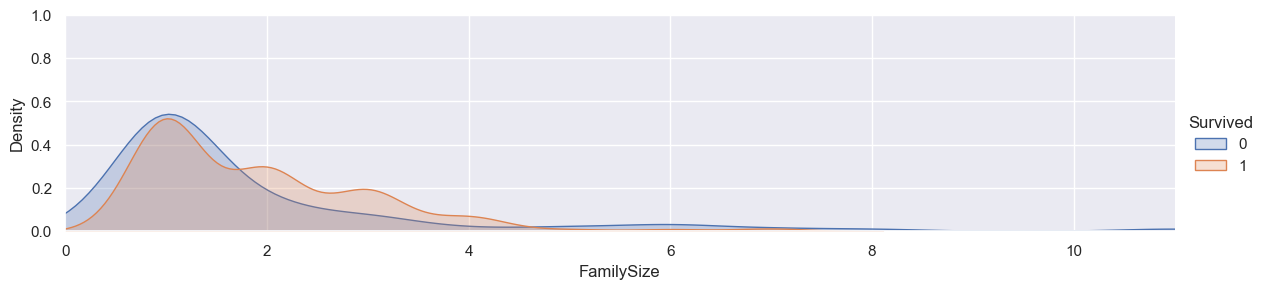

In [1486]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'FamilySize',fill= True)
facet.set(xlim=(0, train['FamilySize'].max()))
facet.add_legend()
plt.ylim(0,1)

In [1487]:
train['FamilySize']

0      2
1      2
2      1
3      2
4      1
      ..
886    1
887    1
888    4
889    1
890    1
Name: FamilySize, Length: 891, dtype: int64

In [1488]:
train_test_data = [train,test]
for dataset in train_test_data:

    dataset.loc[dataset['FamilySize'] == 1,'FamilySize'] = 0.4
    dataset.loc[(dataset['FamilySize'] == 2), 'FamilySize'] = 0.8
    dataset.loc[(dataset['FamilySize'] == 3), 'FamilySize'] = 1.2
    dataset.loc[dataset['FamilySize'] > 3,'FamilySize'] = 1.6


In [1489]:
# family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
# train['FamilySize'] = train['FamilySize'].map(family_mapping)
# test['FamilySize'] = test['FamilySize'].map(family_mapping)

---

### Modelling

In [1490]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [1491]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Title          0
group_size     0
FamilySize     0
dtype: int64

In [1492]:
features_drop = ['Ticket','SibSp','Parch','Name']
train = train.drop(features_drop,axis=1)
test = test.drop(features_drop, axis=1)

In [1493]:
train_data = train.drop('Survived',axis=1)
target = train['Survived']

train_data.shape,target.shape

((891, 10), (891,))

In [ ]:
# RandomForest
parameters = {'n_estimators':[300,500]
              ,'max_depth':[2,4,6,8]
              ,'min_samples_split':[2,4,6,8]
              , 'random_state':[29,30]
              }

k_fold = KFold(n_splits=10,shuffle=True, random_state=42)
rf_clf = RandomForestClassifier()

grid_clf = GridSearchCV(rf_clf,param_grid=parameters,scoring='accuracy',cv=k_fold,n_jobs=-1)

grid_clf.fit(train_data,target)
print(grid_clf.best_params_)
print(grid_clf.best_score_)



In [ ]:
#RadomForest
parameters = {'n_estimators':[700,800]
              ,'max_depth':[8,9]
              ,'min_samples_split':[2,3]
              , 'random_state':[89]
              }

k_fold = KFold(n_splits=10,shuffle=True, random_state=42)
rf_clf = RandomForestClassifier()
scoring = 'accuracy'
grid_clf = GridSearchCV(rf_clf,param_grid=parameters,scoring=scoring,cv=k_fold,n_jobs=-1)

grid_clf.fit(train_data,target)
print(grid_clf.best_params_)
print(grid_clf.best_score_)



KeyboardInterrupt: 

In [1495]:
# XGBClassifier
parameters = {'n_estimators':[300,700,1000]
              ,'max_depth':[2,4,6,8,10]}

k_fold = KFold(n_splits=10,shuffle=True, random_state=89)
xgb_clf = XGBClassifier()
scoring = 'accuracy'
grid_clf = GridSearchCV(xgb_clf,param_grid=parameters,scoring=scoring,cv=k_fold,n_jobs=-1)

grid_clf.fit(train_data,target)
print(grid_clf.best_params_)
print(grid_clf.best_score_)



{'max_depth': 2, 'n_estimators': 300}
0.8046941323345816


In [1496]:
k_fold = KFold(n_splits=10,shuffle=True, random_state=42)
clf = RandomForestClassifier(n_estimators=100
                             , max_depth=8
                             , min_samples_split= 2
                             , random_state=30)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=-1, scoring=scoring)
print(score.mean())

0.8192759051186018


---

### Testing

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
import numpy as np

In [ ]:
train.head(3)

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,group_size,FamilySize
0,1,0,3,0,1,0.8,2.0,0,0,0.0,0.8
1,2,1,1,1,3,2.0,0.8,1,2,0.0,0.8
2,3,1,3,1,2,0.8,2.0,0,1,0.0,0.4


In [1497]:
clf = RandomForestClassifier(n_estimators=300
                             , max_depth=8
                             , min_samples_split= 6
                             , random_state=30)
clf.fit(train_data, target)

prediction = clf.predict(test)


In [1498]:
# feature importance 추출

print("Feature importances:\n{0}".format(np.round(clf.feature_importances_,3)))

# feature 별 importance 매핑

for name, value in zip(train.columns
                       ,clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))

Feature importances:
[0.119 0.075 0.207 0.028 0.071 0.083 0.032 0.263 0.073 0.049]
PassengerId : 0.119
Survived : 0.075
Pclass : 0.207
Sex : 0.028
Age : 0.071
Fare : 0.083
Cabin : 0.032
Embarked : 0.263
Title : 0.073
group_size : 0.049


In [ ]:
submission_a = pd.read_csv('../data/submission_a.csv')
del submission_a['PassengerId']

In [1499]:

# submission_7966 = pd.read_csv('./submission07966.csv')
# del submission_7966['PassengerId']
#accuracy = accuracy_score(submission_7966, submission_a)

accuracy = accuracy_score(prediction, submission_a)

accuracy

0.7559808612440191

In [1509]:
acc_list=[]

for r in range(2,18):
    clf = RandomForestClassifier(n_estimators=290, max_depth=3, min_samples_split=r, random_state=89)
    clf.fit(train_data, target) # 학습
    Y_pred = clf.predict(test) # 테스트 데이터로 예측값 추출    
    
    accuracy = accuracy_score(Y_pred, submission_a)
    print(r, accuracy)
    acc_list.append(accuracy)

acc_list.index(max(acc_list)),max(acc_list)

2 0.7918660287081339
3 0.7918660287081339
4 0.7918660287081339
5 0.7918660287081339
6 0.7918660287081339
7 0.7918660287081339
8 0.7918660287081339
9 0.7918660287081339
10 0.7918660287081339
11 0.7918660287081339
12 0.7918660287081339
13 0.7918660287081339
14 0.7918660287081339
15 0.7918660287081339
16 0.7942583732057417
17 0.7942583732057417


(14, 0.7942583732057417)

In [ ]:
clf = RandomForestClassifier(n_estimators=80
                             , max_depth=4
                             , min_samples_split=8
                             , random_state=2)
clf.fit(train_data, target)

prediction = clf.predict(test)

accuracy = accuracy_score(prediction, submission_a)

accuracy

0.7942583732057417

In [ ]:
submission = pd.DataFrame({

    'PassengerId':test['PassengerId']
    ,'Survived':prediction
    
})

In [ ]:
submission.to_csv('submission.csv',index=False)